In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1),
    'test' : DataLoader(test_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1)
}

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)

In [19]:
import torch
import platform

if platform.system() == "Windows" and torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using CUDA 😈")
elif platform.system() == "Darwin" and torch.backends.mps.is_available():
    device = torch.device('mps')
    print("Using Apple Silicon 👹")
else:
    device = torch.device('cpu')
    print("Using CPU 😴")

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()

    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0}%)]\t{loss.item():.6f}')

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct} / {len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')

Using Apple Silicon 👹


In [20]:
for epoch in range(1, 11):
    train(epoch)
    test()

/var/folders/cs/0p38q9jj01q8230vr6wgk1dr0000gn/T/ipykernel_32546/3659189966.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0e+00%)]	2.302319
Train Epoch: 1 [2000/60000 (3e+00%)]	2.279955
Train Epoch: 1 [4000/60000 (7e+00%)]	2.167180
Train Epoch: 1 [6000/60000 (1e+01%)]	2.120822
Train Epoch: 1 [8000/60000 (1e+01%)]	1.950668
Train Epoch: 1 [10000/60000 (2e+01%)]	2.000720
Train Epoch: 1 [12000/60000 (2e+01%)]	1.921155
Train Epoch: 1 [14000/60000 (2e+01%)]	1.895125
Train Epoch: 1 [16000/60000 (3e+01%)]	1.888458
Train Epoch: 1 [18000/60000 (3e+01%)]	1.783262
Train Epoch: 1 [20000/60000 (3e+01%)]	1.884395
Train Epoch: 1 [22000/60000 (4e+01%)]	1.787205
Train Epoch: 1 [24000/60000 (4e+01%)]	1.777169
Train Epoch: 1 [26000/60000 (4e+01%)]	1.861758
Train Epoch: 1 [28000/60000 (5e+01%)]	1.800504
Train Epoch: 1 [30000/60000 (5e+01%)]	1.803995
Train Epoch: 1 [32000/60000 (5e+01%)]	1.786821
Train Epoch: 1 [34000/60000 (6e+01%)]	1.788640
Train Epoch: 1 [36000/60000 (6e+01%)]	1.822348
Train Epoch: 1 [38000/60000 (6e+01%)]	1.722909
Train Epoch: 1 [40000/60000 (7e+01%)]	1.728303
Train Epoch: 1 [42000

Prediction: Ankle boot


/var/folders/cs/0p38q9jj01q8230vr6wgk1dr0000gn/T/ipykernel_32546/3659189966.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


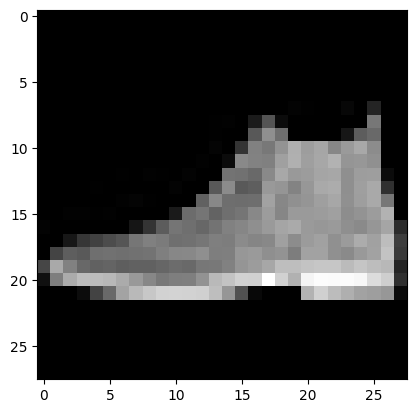

Prediction: Pullover


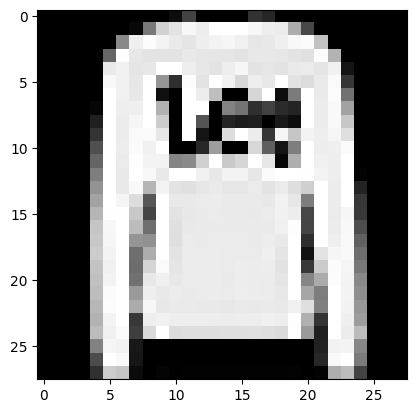

Prediction: Trouser


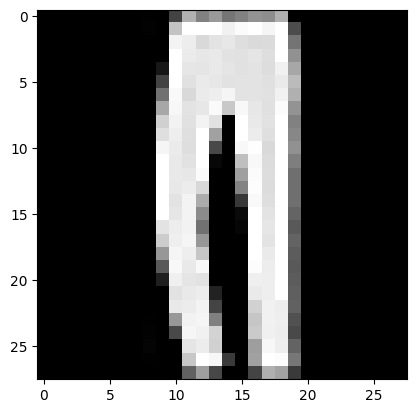

Prediction: Trouser


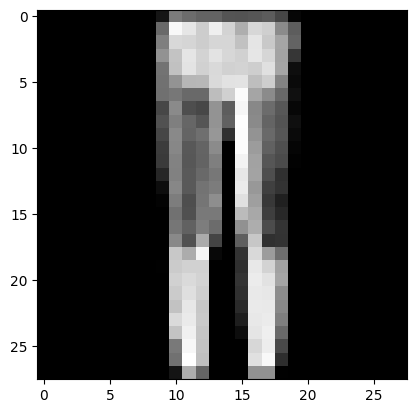

Prediction: Shirt


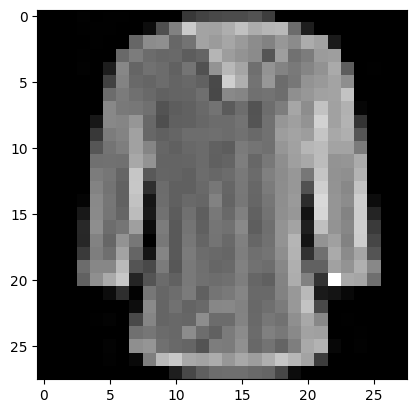

Prediction: Trouser


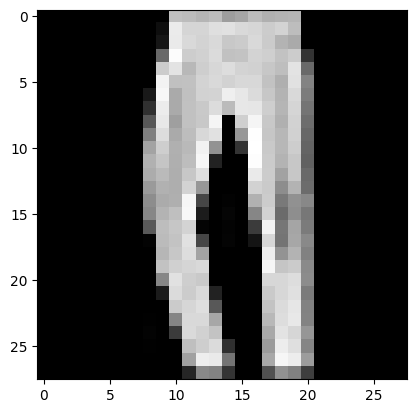

Prediction: Coat


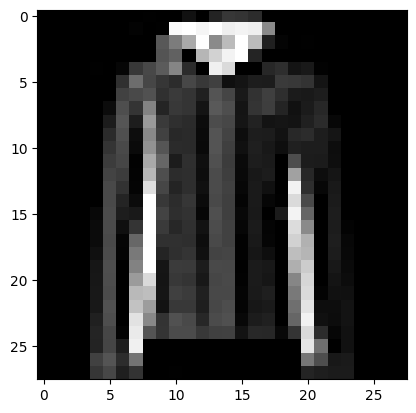

Prediction: Shirt


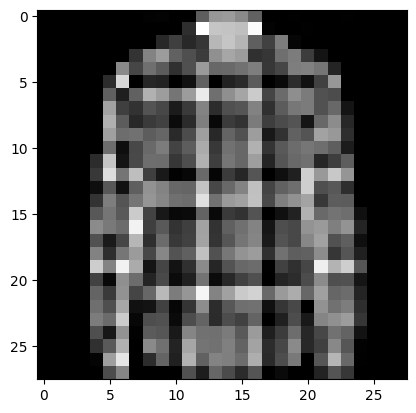

Prediction: Sandal


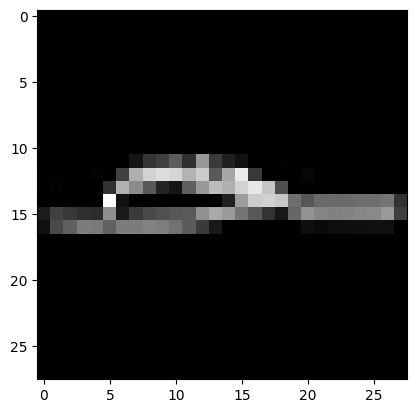

Prediction: Sneaker


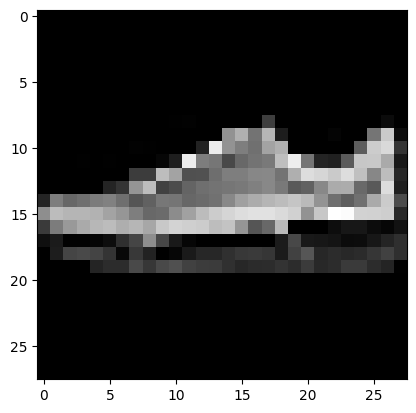

Prediction: Coat


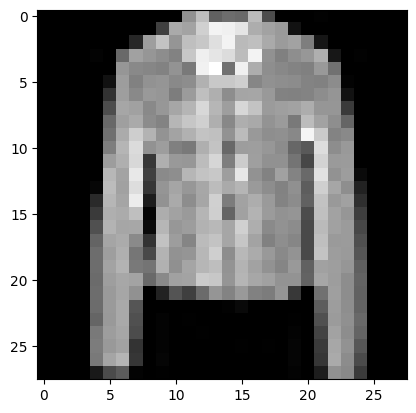

Prediction: Sandal


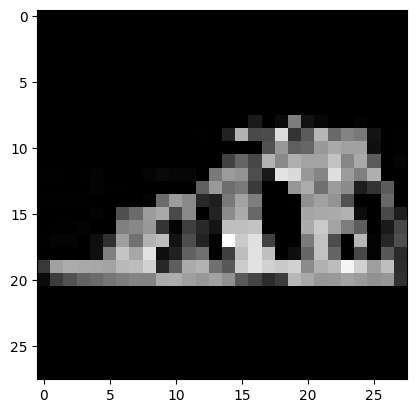

Prediction: Sandal


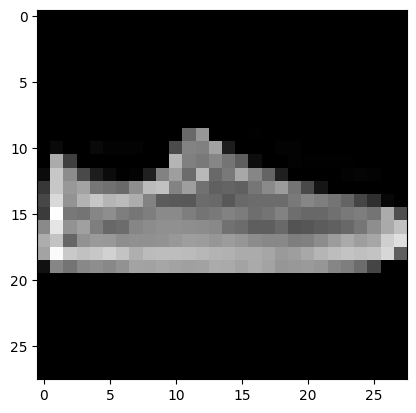

Prediction: Dress


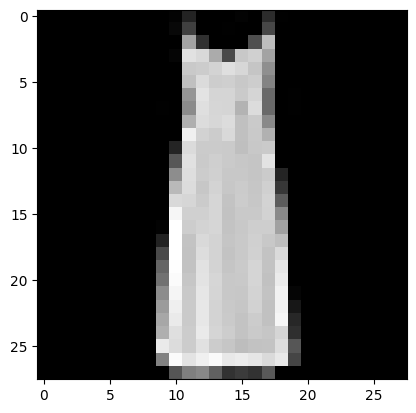

Prediction: Coat


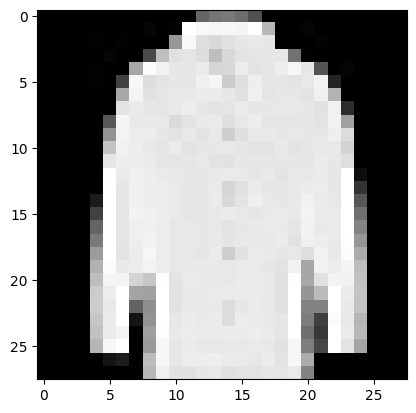

Prediction: Trouser


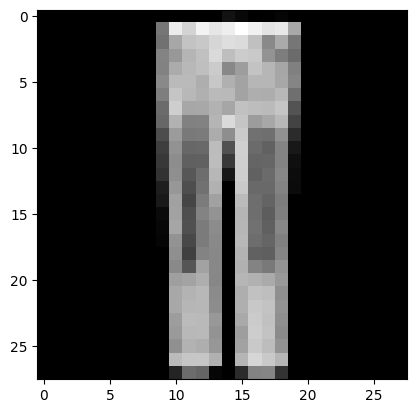

Prediction: Pullover


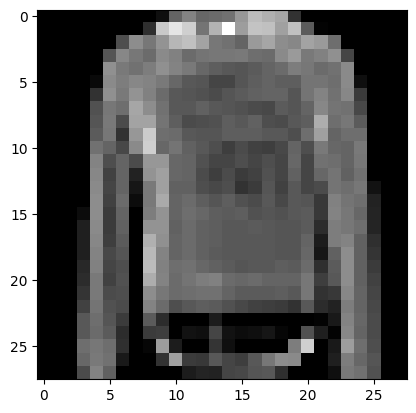

Prediction: Shirt


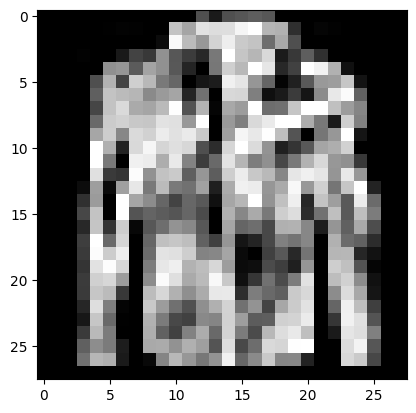

Prediction: Bag


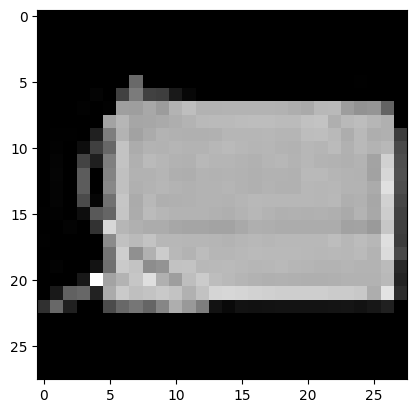

Prediction: T-shirt/top


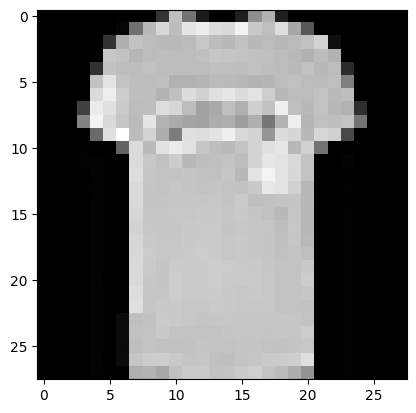

In [24]:
import matplotlib.pyplot as plt

model.eval()

class_names = test_data.classes

for i in range(20):
    data, target = test_data[i]

    data = data.unsqueeze(0).to(device)

    output = model(data)

    prediction = output.argmax(dim=1, keepdim=True).item()

    clothing_name = class_names[prediction]

    print(f'Prediction: {clothing_name}')

    image = data.squeeze(0).squeeze(0).cpu().numpy()
    
    plt.imshow(image, cmap='gray')
    plt.show()